
<b> Steps followed: </b>

1.) Importing the data

2.) Inspecting the dataframe

3.) Data Preparation

4.) Exploratory Data Analysis

5.) Dummy variable creation

6.) Splitting into train and test datasets 

7.) Feature Scaling 

8.) Looking at correlations 

9.) Model Building 

10.) Feature Selection Using RFE

11.) Model Evaluation 

12.) Final Model involving final feature selection

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [434]:
#Importing important libraries:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

### Step 1: Importing Data

In [436]:
#Importing and reading the file:
os.getcwd()

'/Users/abhinav/Desktop/CAREER/UPGRAD COURSE'

In [438]:
os.chdir('/Users/abhinav/Desktop/CAREER/UPGRAD COURSE')
leads_data=pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', None)
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [192]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [194]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# Missing Data Percentage 
((leads_data.isnull().sum())/9240)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [18]:
#Looking at the dataset, we observe that we need to encode categorical variables, convert binary variables
#to 0/1, handle missing values, convert all selects to NaN (null value), drop columns having more than 70% null values

### Step 3: Data Preparation

In [440]:
#Dropping unimportant columns such as Prospect ID and Lead Number: 
leads_data.drop(columns=['Prospect ID','Lead Number'],inplace=True)

In [442]:
#Convert some binary variables to Yes/No:
binary_cols=['Do Not Email','Search','Do Not Call','Newspaper Article','Magazine','Get updates on DM Content','Search',
         'I agree to pay the amount through cheque','A free copy of Mastering The Interview','X Education Forums','Newspaper',
        'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
        ]
for col in binary_cols:
    leads_data[col]=leads_data[col].apply(lambda x : 1 if x=='Yes' else 0)
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


**Converting SELECTs into NaNs:**

In [444]:
#Replacing all the 'select' values with Nan in categorical variables:
leads_data.replace('Select',np.nan,inplace=True)

In [446]:
#Dropping columns which have above 70% null values:
leads_data=leads_data.drop(['How did you hear about X Education','Lead Profile'],axis=1)

In [10]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [448]:
#As the Lead Quality depends upon the perspective of employee, all null values in this column will be replaced
#as not sure:
leads_data['Lead Quality'] = leads_data['Lead Quality'].replace(np.nan, 'Not Sure')

In [206]:
#As there are too many variations in the cols such as 'Asymmetrique Activity Index','Asymmetrique Activity Score',
#'Asymmetrique Profile Index','Asymmetrique Profile Score' and it is not safe to replace these missing values, we will drop
#these columns 

In [450]:
leads_data = leads_data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index',
                        'Asymmetrique Profile Score'],axis=1)

In [452]:
#Replacing certain categorical cols with their respective modes:
leads_data['City'] = leads_data['City'].replace(np.nan, 'Mumbai')
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan, 'Other_Specialization')
leads_data['Tags'] = leads_data['Tags'].replace(np.nan, 'Will revert after reading the email')
leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')
leads_data['Country'] = leads_data['Country'].replace(np.nan, 'India')

In [454]:
#Checking updated missing value percentage 
((leads_data.isnull().sum())/9240)*100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [456]:
#Remaining cols that have null values, have percentage of less than 1.5% so these rows can be dropped:
leads_data.dropna(inplace=True)
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


<b> Step 4: EDA </b>

In [458]:
#Checking for any imbalance in the target variable:
(sum(leads_data['Converted'])/len(leads_data['Converted']))*100

37.85541106458012

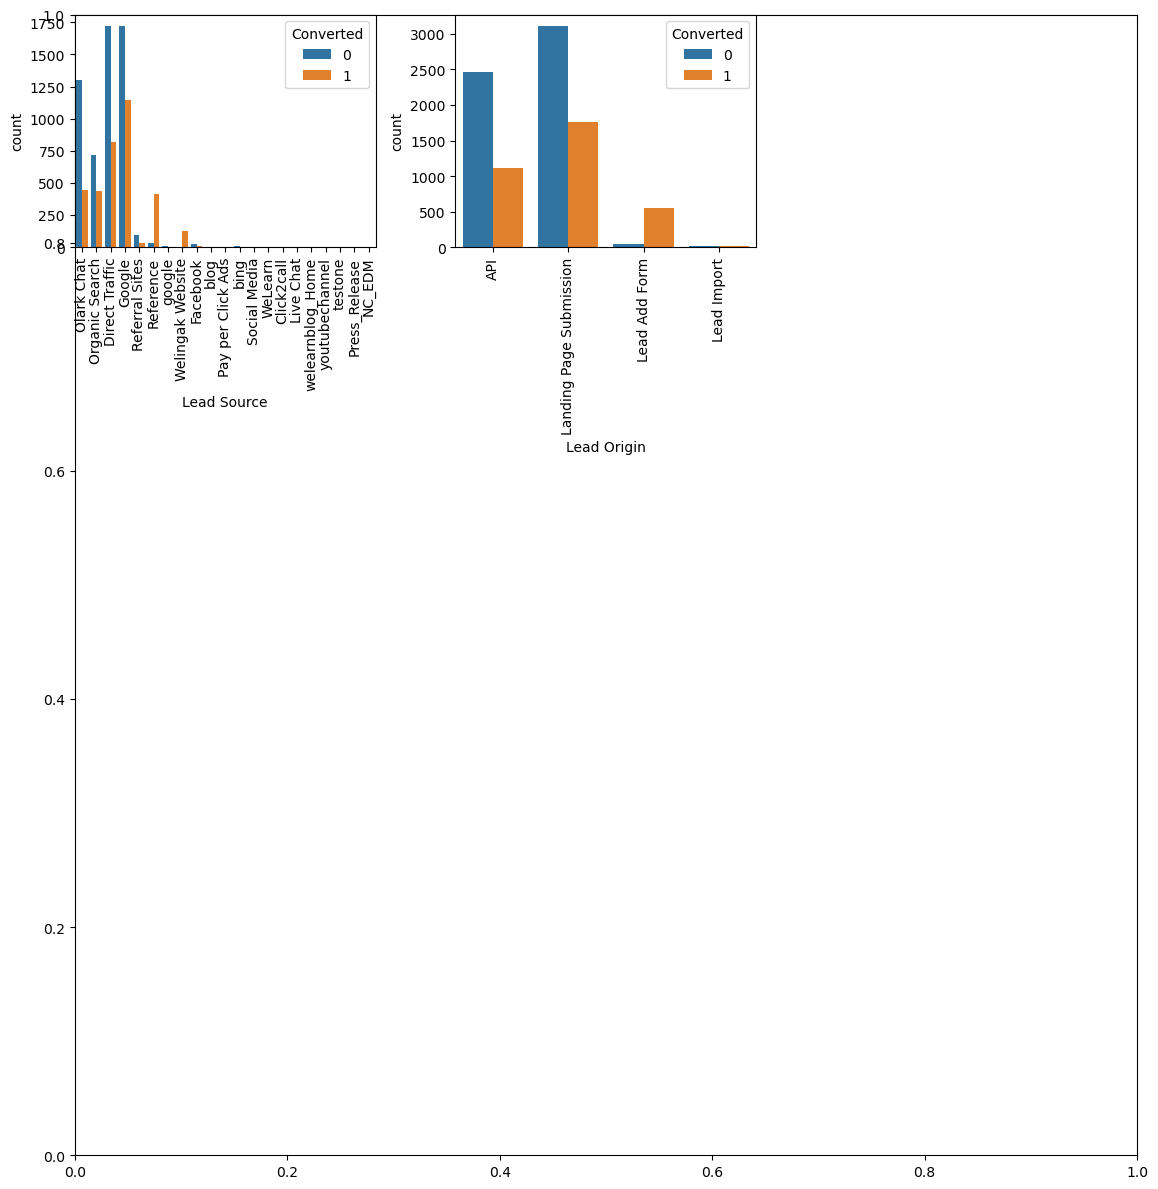

In [460]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 12))
# Loop through the features and plot the countplots
for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3, 3, i+1)  
    plt.subplots_adjust(hspace=2.0)  # Adjust spacing between plots
    sns.countplot(data=leads_data, x=feature, hue="Converted") 
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout for better spacing

<b> OBSERVATION: </b> 

API and Landing Page Submission has less conversion rate of approximately less than 30% but counts of the leads from them are also high. 
The count of leads from the Lead Add Form is quite low but the conversion rate is very high. 
Lead Import has very less count as well as conversion rate and hence can be ignored. Also, the conversion rate of the leads from Reference and Welingak Website is maximum
Threfore, to improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'.

In [462]:
# We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis

leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

leads_data['Lead Source'] = leads_data['Lead Source'].replace("google", 'Google')

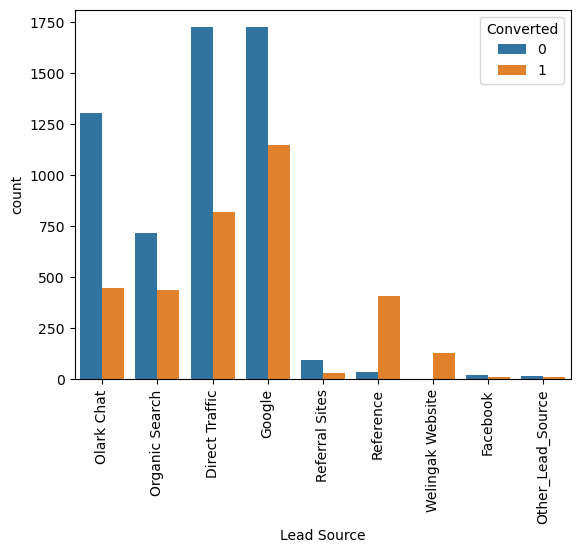

In [464]:
# Plotting Lead Source again

sns.countplot(x="Lead Source", hue="Converted", data= leads_data)
plt.xticks(rotation='vertical')
plt.show()

In [90]:
#To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 
#'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website' as the count of leads 
#from the Google and Direct Traffic is maximum. 
#Also, the conversion rate of the leads from Reference and Welingak Website is maximum

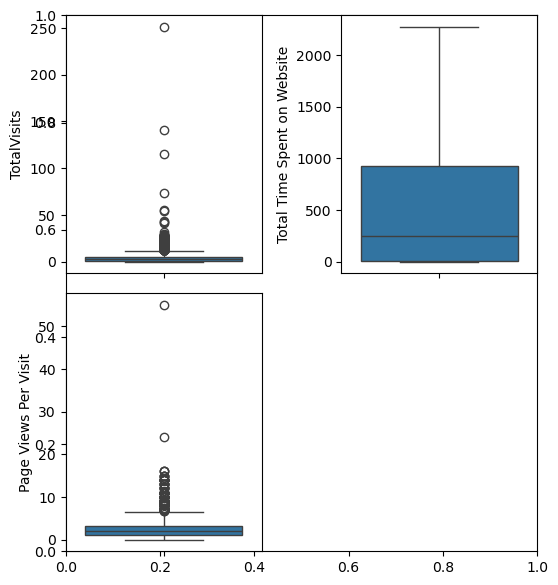

In [466]:
#Plotting boxplots below to check for any outliers in the columns TotalVisits, Page Views per Visit and
#Total Time Spent on Website 
#which are continuous variables
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website","Page Views Per Visit"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(leads_data[feature])
    plt.tight_layout()

In [468]:
# There are lot of outliers in the Total Visits and Page Views per Visit column, we will replace them 
#using the IQR method:
def replace_outliers_with_iqr_in_place(data):
    # Calculate the first and third quartiles
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)


    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with IQR in the original array
    data[data < lower_bound] = IQR
    data[data > upper_bound] = IQR
    
    return data
#Applying the function on cols such as TotalVisits and Page Views Per Visit
replace_outliers_with_iqr_in_place(leads_data['TotalVisits'])
replace_outliers_with_iqr_in_place(leads_data['Page Views Per Visit'])

0       0.00
1       2.50
2       2.00
3       1.00
4       1.00
        ... 
9235    2.67
9236    2.00
9237    2.00
9238    3.00
9239    3.00
Name: Page Views Per Visit, Length: 9074, dtype: float64

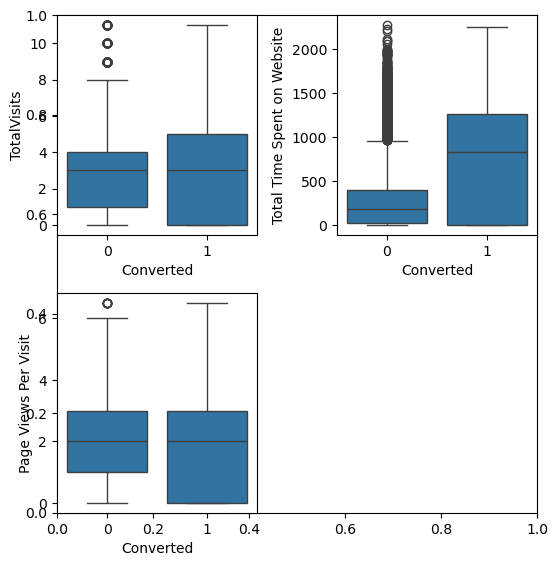

In [470]:
#Comparing converted/non-converted total number in the above continuous columns:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website","Page Views Per Visit"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = leads_data)
    plt.tight_layout()

**OBSERVATION:**

- The median of both the conversion and non-conversion are same and hence nothing conclusive can be said using this information for the
  TotalVisits and Page Views Per Visit column.

- Users spending more time on the website are more likely to get converted as there is a big difference between median time spent on website
between those converted and those not converted.

Therefore, it can be interpreted that websites can be made more appealing so as to increase the time of the Users on websites**

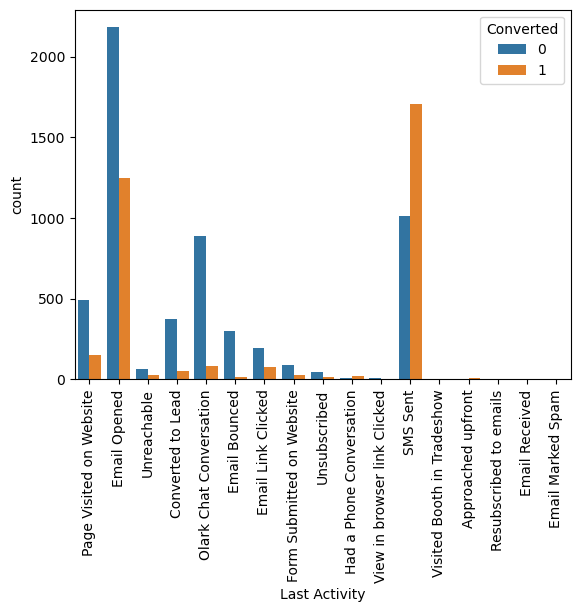

In [472]:
# See conversion and non-conversion for columns of Last Activity:

sns.countplot(x="Last Activity", hue="Converted", data= leads_data)
plt.xticks(rotation='vertical')
plt.show()

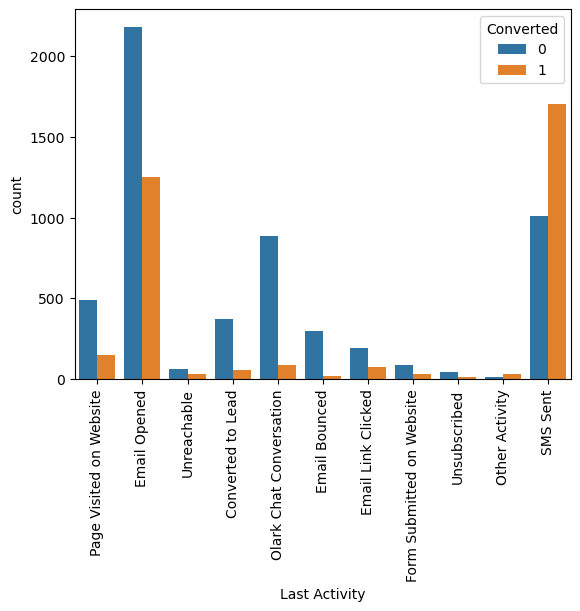

In [474]:
# As we see, categories such as Email Link Clicked, View in browser link Clicked, Approached upfront etc. 
#have very low counts so converting all them to a miscellaneous category called 'Others': 
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# lets plot the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted", data= leads_data)
plt.xticks( rotation='vertical')
plt.show()

In [109]:
#We observe that the maximum count of last activity is the category "Email Opened" and the conversion rate 
#of SMS sent is maximum
#So, X_education needs to focus on increasing the conversion rate of those having last activity as Email Opened by making a call to 
#those leads and also try to increase the count of the ones having last activity as SMS sent

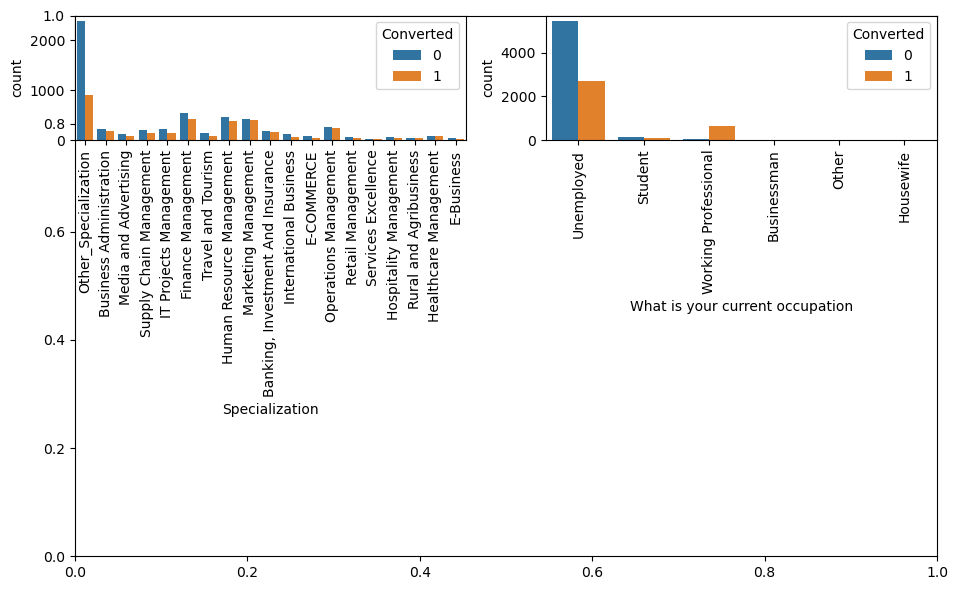

In [476]:
#Seeing the conversion, non-conversion for columns Specialization and What is your current location:
fig=plt.subplots(figsize=(10, 6))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=leads_data)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

In [121]:
#There is no particular inference can be made for Specialization as most values correspond to Specicialization category
#and we can say that working professionals have high conversion rate
#Moreover, number of Unemployed leads are more than any other category although they have a lower conversion rate. 
#Hence, to increase overall conversion rate, company needs to increase the number of Working Professional leads by reaching out 
#to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads. 

In [1]:
# Columns such as Country, What matters most to you in choosing a course, City columns 
#have most values corresponding to one value such as India for Country, Mumbai for city and hence there
#is no particular insights for these columns

In [478]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [480]:
#Checking how binary columns are distributed:
leads_data[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.0,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.000000
mean,0.0,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.318272
std,0.0,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.465831
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
10%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
20%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
30%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
40%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
60%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [131]:
#We can clearly see that most values in the all the columns are 0 i.e. "No" and hence no inference can be made using these columns

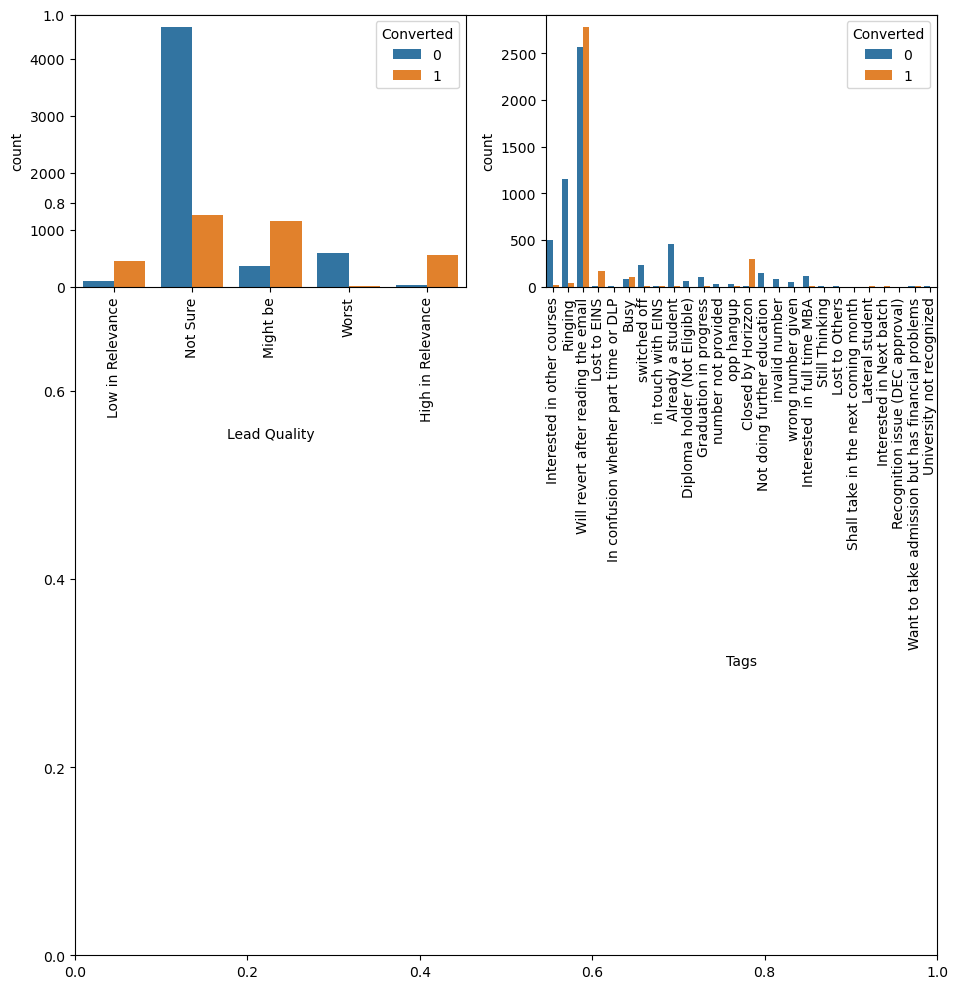

In [482]:
#Seeing conversion and non-conversion for Lead Quality and Tags:
fig=plt.subplots(figsize=(10, 10))

for i, feature in enumerate(["Lead Quality", "Tags"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=leads_data)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

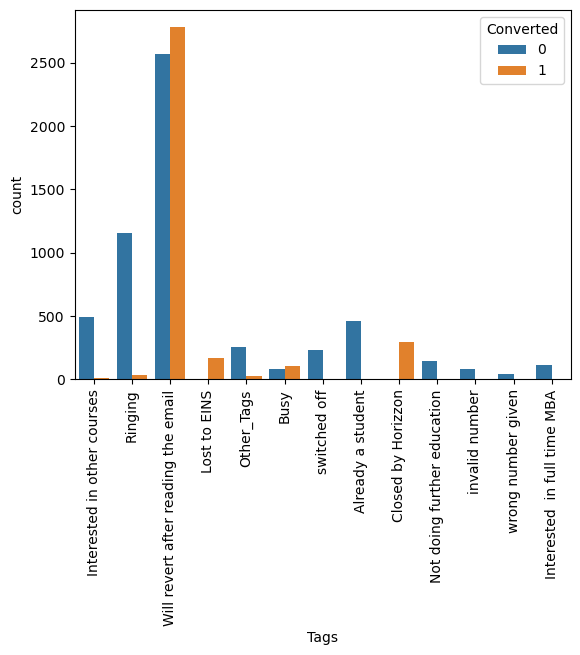

In [484]:
# Converting all low count categories to Others category in Tags column
leads_data['Tags'] = leads_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

# lets plot the Tags column again
sns.countplot(x="Tags", hue="Converted", data= leads_data)
plt.xticks( rotation='vertical')
plt.show()

We observe that categories'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate
Therefore,to improve the overall lead conversion rate, business needs to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' Lead Origins and also increasing the number of leads from 'Lead Add Form'. The business also needs to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'. Websites can be made more appealing so as to increase the time of the Users on websites. 
X_education should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent. To increase overall conversion rate, X_education need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads. We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis. 

In [486]:
# Dropping unnecessary columns:
leads_data=leads_data.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],axis=1)

leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### Step 5: Dummy Variable Creation

In [488]:
#Creating dummy variables for the columns below:
dummy = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,F

In [490]:
#Dropping original columns we created dummy variables on:
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1)
leads_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0.0,0,0.0
1,0,0,5.0,674,2.5
2,0,1,2.0,1532,2.0
3,0,0,1.0,305,1.0
4,0,1,2.0,1428,1.0


In [492]:
#Adding these dummy variables to the master df:
leads_data = pd.concat([leads_data, dummy], axis=1)
leads_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,0,1,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,Fa

### Step 6: Test-Train Split

In [494]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)
# Putting response variable to y
y = leads_data['Converted']

print(y)

X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,0,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,

In [496]:
#Splitting into train and test datasets in the 70-30 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 7: Feature Scaling

In [498]:
#Applying transform into the train and test dataset for continuous variables in order to know about mean 
#and standard deviation:"
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.40704,-0.160255,-0.083397,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1012,1,-0.40704,-0.540048,-0.083397,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9226,0,-1.18698,-0.888650,-1.298655,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,Fals

In [500]:
### Checking the Conversion Rate
(sum(leads_data['Converted'])/len(leads_data['Converted']))*100

37.85541106458012

### Step 8: Looking at Correlations

This is to check if any variables have unnecessarily high correlations between each other and drop them accordingly. 

In [502]:
leads_data.dtypes

Do Not Email                                            int64
Converted                                               int64
TotalVisits                                           float64
Total Time Spent on Website                             int64
Page Views Per Visit                                  float64
                                                       ...   
Last Notable Activity_Resubscribed to emails             bool
Last Notable Activity_SMS Sent                           bool
Last Notable Activity_Unreachable                        bool
Last Notable Activity_Unsubscribed                       bool
Last Notable Activity_View in browser link Clicked       bool
Length: 85, dtype: object

In [504]:
# Correlation between different numerical variables for both the Converted and not-converted cases
correlation_matrix=leads_data.corr()
#Seeing which pair of variables has correlation of 0.5 or above with each other or -0.5 and below: 
correlation_matrix[((correlation_matrix>=0.50)|(correlation_matrix<=-0.50))&(correlation_matrix!=1.00)].stack().reset_index()

,level_0,level_1,0
0,Do Not Email,Last Activity_Email Bounced,0.620041
1,TotalVisits,Page Views Per Visit,0.695319
2,TotalVisits,Lead Source_Olark Chat,-0.522541
3,Page Views Per Visit,TotalVisits,0.695319
4,Page Views Per Visit,Lead Origin_Landing Page Submission,0.561691
5,Page Views Per Visit,Lead Source_Olark Chat,-0.592642
6,Lead Origin_Landing Page Submission,Page Views Per Visit,0.561691
7,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,-0.528424
8,Lead Origin_Landing Page Submission,Specialization_Other_Specialization,-0.755381
9,Lead Origin_Lead Add Form,Lead Source_Reference,0.866191


In [506]:
# Dropping highly correlated features

X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], axis=1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], axis=1)

In [508]:
# Correlation between different numerical variables for both the Converted and not-converted cases
correlation_matrix=X_train.corr()
#Checking the correlations once again:
correlation_matrix[((correlation_matrix>=0.50)|(correlation_matrix<=-0.50))&(correlation_matrix!=1.00)].stack().reset_index()

,level_0,level_1,0
0,Do Not Email,Last Activity_Email Bounced,0.624939
1,TotalVisits,Page Views Per Visit,0.701044
2,TotalVisits,Lead Source_Olark Chat,-0.510493
3,Page Views Per Visit,TotalVisits,0.701044
4,Page Views Per Visit,Lead Origin_Landing Page Submission,0.559457
5,Page Views Per Visit,Lead Source_Olark Chat,-0.582254
6,Lead Origin_Landing Page Submission,Page Views Per Visit,0.559457
7,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,-0.514472
8,Lead Origin_Landing Page Submission,Specialization_Other_Specialization,-0.753135
9,Lead Origin_Lead Add Form,Lead Source_Reference,0.859537


### Step 9: Model Building

In [510]:
#Converting boolean columns to 0 or 1 as per requirements for statsmodels
X_train=X_train.astype(int)

In [512]:
y_train.dtypes

dtype('int64')

In [514]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           77
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1352.1
Date:                Fri, 28 Feb 2025   Deviance:                       2704.1
Time:                        19:47:37   Pearson chi2:                 4.74e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5964
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7364      2.032      0.854      0.393      -2.247       5.720
Do Not Email                                            -1.4649      0.308     -4.761      0.000      -2.068      -0.862
TotalVisits                                              0.0998      0.093      1.077      0.282      -0.082       0.282
Total Time Spent on Website                              1.4906      0.103     14.413      0.000       1.288       1.693
Page Views Per Visit                                    -0.2803      0.108     -2.595      0.009      -0.492      -0.069
Lead Origin_Landing Page Submission                     -1.2123      0.211     -5.755      0.000      -1.625      -0.799
Lead Origin_Lead Add Form                               -1.2162      1.339     -0.908      0.364      -3.841       1.408
Lead Origin_Lead Import                                  0.0503      0.841      0.060      0.952      -1.599       1.699
Lead Source_Google                                       0.2007      0.146      1.378      0.168      -0.085       0.486
Lead Source_Olark Chat                                   0.0445      0.233      0.191      0.849      -0.413       0.502
Lead Source_Organic Search                               0.1775      0.192      0.924      0.355      -0.199       0.554
Lead Source_Other_Lead_Source                            1.1613      0.818      1.420      0.155      -0.441       2.764
Lead Source_Reference                                    1.5886      1.395      1.139      0.255      -1.145       4.323
Lead Source_Referral Sites                              -0.2171      0.469     -0.463      0.643      -1.135       0.701
Lead Source_Welingak Website                             5.4648      1.532      3.567      0.000       2.462       8.468
Last Activity_Email Bounced                             -0.3681      0.828     -0.444      0.657      -1.992       1.255
Last Activity_Email Link Clicked                        -0.8577      0.451     -1.902      0.057      -1.741       0.026
Last Activity_Email Opened                              -0.4318      0.334     -1.294      0.196      -1.086       0.222
Last Activity_Form Submitted on Website                  0.1063      0.573      0.185      0.853      -1.017       1.230
Last Activity_Olark Chat Conversation                   -0.5279      0.377     -1.401      0.161      -1.267       0.211
Last Activity_Other Activity                             1.2475      1.051      1.187      0.235      -0.812       3.307
Last Activity_Page Visited on Website                   -0.3820      0.381     -1.002      0.316      -1.129       0.365
Last Activity_SMS Sent                                   1

In [280]:
#Since all of the variables have p-value of 0, therefore all of them are statistically significant. Now, to answer
#one of the business questions of finding top variables contributing most to lead conversion, we use recursive feature elimination (RFE)

### Step 10: Feature Selection Using RFE

In [516]:
# Starting with 15 features selected by RFE
# We will then optimize the model further by inspecting VIF and p-value of the features

from sklearn.feature_selection import RFE
rfe=RFE(estimator=logreg,n_features_to_select=15) #Selecting top 3 variables to perform RFE on
rfe=rfe.fit(X_train,y_train)
#To check features are selected
selected_features=rfe.support_
print('Selected features:',selected_features)

Selected features: [False False  True False False  True False False False False False False
 False  True False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True False False  True False False  True  True  True  True False False
 False  True  True False False False False False False False False False
 False  True  True False False]


In [517]:
#Those variables with ranking greater than 1 are False so will be eliminated:
col = X_train.columns[rfe.support_]

In [288]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [520]:
#Since we want find the statistics, we build a model using these columns without the variables containg False:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1450.9
Date:                Fri, 28 Feb 2025   Deviance:                       2901.9
Time:                        19:47:46   Pearson chi2:                 2.47e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5836
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6354      0.230     -7.117      0.000      -2.086      -1.185
Total Time Spent on Website                       1.3913      0.095     14.629      0.000       1.205       1.578
Lead Origin_Lead Add Form                         1.2746      0.366      3.484      0.000       0.558       1.992
Lead Source_Welingak Website                      3.1048      0.820      3.788      0.000       1.498       4.711
Last Activity_SMS Sent                            1.8334      0.106     17.273      0.000       1.625       2.041
Tags_Busy                                         3.4390      0.333     10.331      0.000       2.787       4.091
Tags_Closed by Horizzon                           8.5196      0.787     10.820      0.000       6.976      10.063
Tags_Lost to EINS                                 9.4008      0.772     12.181      0.000       7.888      10.913
Tags_Ringing                                     -1.7954      0.340     -5.286      0.000      -2.461      -1.130
Tags_Will revert after reading the email          3.7401      0.238     15.685      0.000       3.273       4.208
Tags_invalid number                             -22.3040   1.36e+04     -0.002      0.999   -2.66e+04    2.66e+04
Tags_switched off                                -2.4874      0.614     -4.051      0.000      -3.691      -1.284
Lead Quality_Not Sure                            -3.3742      0.133    -25.363      0.000      -3.635      -3.113
Lead Quality_Worst                               -4.0014      0.829     -4.824      0.000      -5.627      -2.376
Last Notable Activity_Modified                   -1.7515      0.111    -15.722      0.000      -1.970      -1.533
Last Notable Activity_Olark Chat Conversation    -1.4659      0.385     -3.805      0.000      -2.221      -0.711
=================================================================================================================
"""

In [522]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.219354
1012    0.219354
9226    0.001201
4750    0.876015
7987    0.999294
1281    0.980888
2880    0.219354
4971    0.839448
7536    0.992515
1248    0.004812
dtype: float64

In [524]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21935372, 0.21935372, 0.00120134, 0.8760148 , 0.99929434,
       0.98088764, 0.21935372, 0.83944815, 0.99251487, 0.00481197])

In [526]:
#Since we want find the statistics, we build a model using these columns without the variables containg False:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.219354,3009
1,0,0.219354,1012
2,0,0.001201,9226
3,1,0.876015,4750
4,1,0.999294,7987


In [528]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.219354,3009,0
1,0,0.219354,1012,0
2,0,0.001201,9226,0
3,1,0.876015,4750,1
4,1,0.999294,7987,1


In [530]:
#Getting accuracy score of the model:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9225318847425602


In [314]:
#This is a very good accuracy of model, but now we also have to see for any multicollinearity among the features 
#so we need to check VIFs to eliminate the redundant features. 

#### Checking VIFs

In [532]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
11                          Lead Quality_Not Sure                       3.03
8        Tags_Will revert after reading the email                       2.94
3                          Last Activity_SMS Sent                       1.66
13                 Last Notable Activity_Modified                       1.66
1                       Lead Origin_Lead Add Form                       1.62
7                                    Tags_Ringing                       1.54
2                    Lead Source_Welingak Website                       1.35
0                     Total Time Spent on Website                       1.31
5                         Tags_Closed by Horizzon                       1.20
4                                       Tags_Busy                       1.12
12                             Lead Quality_Worst                       1.11
10                              Tags_switched off                       1.10

In [318]:
#All variables have a good value of VIF. But we observed earlier that the column "Tags_invalid number" has high p-value 
#and hence we will drop this column and remake the model.

In [534]:
col = col.drop('Tags_invalid number')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [536]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1455.9
Date:                Fri, 28 Feb 2025   Deviance:                       2911.8
Time:                        19:48:09   Pearson chi2:                 2.44e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5830
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7912      0.229     -7.812      0.000      -2.241      -1.342
Total Time Spent on Website                       1.3957      0.095     14.678      0.000       1.209       1.582
Lead Origin_Lead Add Form                         1.3118      0.368      3.566      0.000       0.591       2.033
Lead Source_Welingak Website                      3.0668      0.820      3.739      0.000       1.459       4.675
Last Activity_SMS Sent                            1.8101      0.106     17.145      0.000       1.603       2.017
Tags_Busy                                         3.5982      0.332     10.845      0.000       2.948       4.248
Tags_Closed by Horizzon                           8.6537      0.788     10.985      0.000       7.110      10.198
Tags_Lost to EINS                                 9.5321      0.772     12.354      0.000       8.020      11.044
Tags_Ringing                                     -1.6261      0.338     -4.815      0.000      -2.288      -0.964
Tags_Will revert after reading the email          3.8907      0.238     16.325      0.000       3.424       4.358
Tags_switched off                                -2.3127      0.613     -3.774      0.000      -3.514      -1.112
Lead Quality_Not Sure                            -3.3648      0.133    -25.360      0.000      -3.625      -3.105
Lead Quality_Worst                               -3.9493      0.833     -4.740      0.000      -5.582      -2.316
Last Notable Activity_Modified                   -1.7403      0.111    -15.650      0.000      -1.958      -1.522
Last Notable Activity_Olark Chat Conversation    -1.4702      0.385     -3.815      0.000      -2.225      -0.715
=================================================================================================================
"""

In [538]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.220063,3009,0
1,0,0.220063,1012,0
2,0,0.001214,9226,0
3,1,0.874410,4750,1
4,1,0.999281,7987,1


In [540]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9219020626672965


In [328]:
#The accuracy has not changed much 

##### Let's now check the VIFs again

In [542]:
calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
10                          Lead Quality_Not Sure                       2.97
8        Tags_Will revert after reading the email                       2.89
12                 Last Notable Activity_Modified                       1.66
3                          Last Activity_SMS Sent                       1.65
1                       Lead Origin_Lead Add Form                       1.62
7                                    Tags_Ringing                       1.53
2                    Lead Source_Welingak Website                       1.35
0                     Total Time Spent on Website                       1.31
5                         Tags_Closed by Horizzon                       1.20
4                                       Tags_Busy                       1.12
11                             Lead Quality_Worst                       1.11
9                               Tags_switched off                       1.10

In [333]:
#All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with 
#making predictions using this model only

<b> Step 11: Model Evaluation </b>

In [544]:
#Creating a function that prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, 
#Positive Predictive Value returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [546]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3660  245]
 [ 251 2195]]
Accuracy : 0.9219020626672965
Sensitivity : 0.8973834832379395
Specificity : 0.9372599231754162
Precision : 0.8995901639344263


(0.9219020626672965,
 0.8973834832379395,
 0.9372599231754162,
 0.8995901639344263)

### Plotting the ROC Curve

An ROC curve 
- shows tradeoff between sensitivity and specificity (increase in one will cause decrease in other).
- The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.

Here, we need to have achieve good sensitivity score

In [548]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [550]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

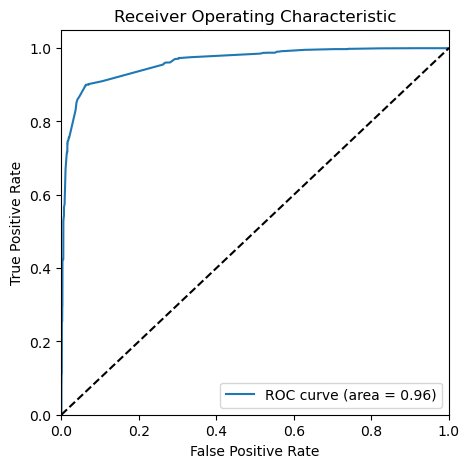

In [552]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

In [348]:
#The ROC curve area if 0.96 indicating an excellent performance of the model, however, to further improve accuracy,
#we could find the optimal value of the cut-off

###  Finding optimal value of the cut off

Optimal cut-off probability is the prob where we get balanced sensitivity and specificity

In [554]:
# Predicting Convert status with different probability cutoffs
for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.220063,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.220063,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.001214,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.874410,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.999281,7987,1,1,1,1,1,1,1,1,1,1,1


In [556]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.

df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.385136,1.000000,0.000000,0.385136
0.1,0.1,0.800819,0.973017,0.692958,0.664990
0.2,0.2,0.820973,0.956255,0.736236,0.694271
0.3,0.3,0.918281,0.902289,0.928297,0.887415
0.4,0.4,0.918910,0.900654,0.930346,0.890101
0.5,0.5,0.921902,0.897383,0.937260,0.899590
0.6,0.6,0.912297,0.830744,0.963380,0.934253
0.7,0.7,0.893560,0.755928,0.979770,0.959025
0.8,0.8,0.893560,0.753884,0.981050,0.961418
0.9,0.9,0.828846,0.566231,0.993342,0.981573


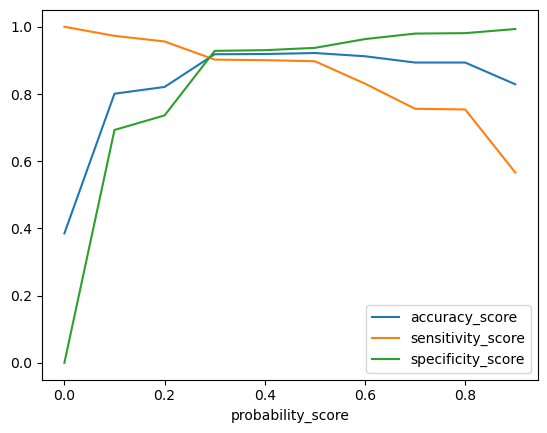

In [558]:
#Plotting accuracy, sensitivity, specificity curves and their intersection:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

### Precision-Recall Trade off

These are used to evaluate how accurate a model can predict a target class

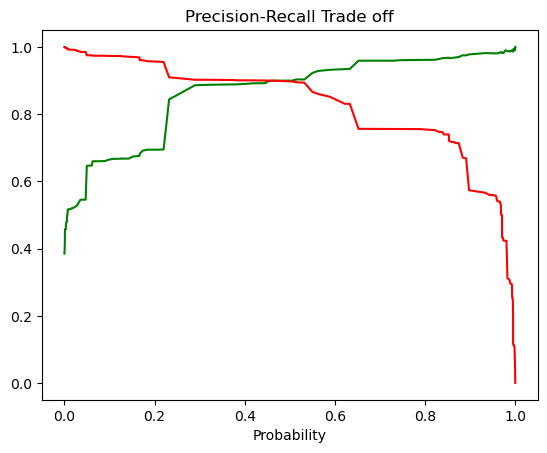

In [560]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

In Sensitivity-Specificity-Accuracy plot 0.27 probability looks optimal as the cut-off
In Precision-Recall Curve 0.3 looks optimal. We are taking 0.27 is the optimum point as a cutoff probability and assigning Lead Score in training data. Therefore, anything above this probability of 0.27 is classified as a 'Hot Lead'

In [562]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.220063,3009,0,22
1,0,0.220063,1012,0,22
2,0,0.001214,9226,0,0
3,1,0.874410,4750,1,87
4,1,0.999281,7987,1,100


In [564]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[3621  284]
 [ 239 2207]]
Accuracy : 0.9176507636592662
Sensitivity : 0.9022894521668029
Specificity : 0.9272727272727272
Precision : 0.885989562424729


(0.9176507636592662, 0.9022894521668029, 0.9272727272727272, 0.885989562424729)

In [566]:
# Getting the predicted values on the test set
#Performing the same standardization as done on train set:
X_test.loc[:,~X_test.columns.isin(['TotalVisits','Total Time Spent on Website','Asymmetrique Activity Score','Asymmetrique Profile Score'])]=\
X_test.loc[:,~X_test.columns.isin(['TotalVisits','Total Time Spent on Website','Asymmetrique Activity Score','Asymmetrique Profile Score'])].astype(int)
#Converting all cols except the ones already standardized to 1/0 as they are boolean:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.110055,0,11
1,1,1490,0.991363,1,99
2,0,7936,0.090918,0,9
3,1,4216,0.994555,1,99
4,0,3830,0.111821,0,11


In [397]:
# Evaluating model performance on test data
evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[1564  170]
 [  88  901]]
Accuracy : 0.9052515607785531
Sensitivity : 0.9110212335692619
Specificity : 0.9019607843137255
Precision : 0.8412698412698413


(0.9052515607785531,
 0.9110212335692619,
 0.9019607843137255,
 0.8412698412698413)

In [399]:
#Accuracy does not change much from the train dataset so model accuracy is so far great

In [408]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Step 12 : Final Model involving final feature selection

Available columns in X_train: ['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation']


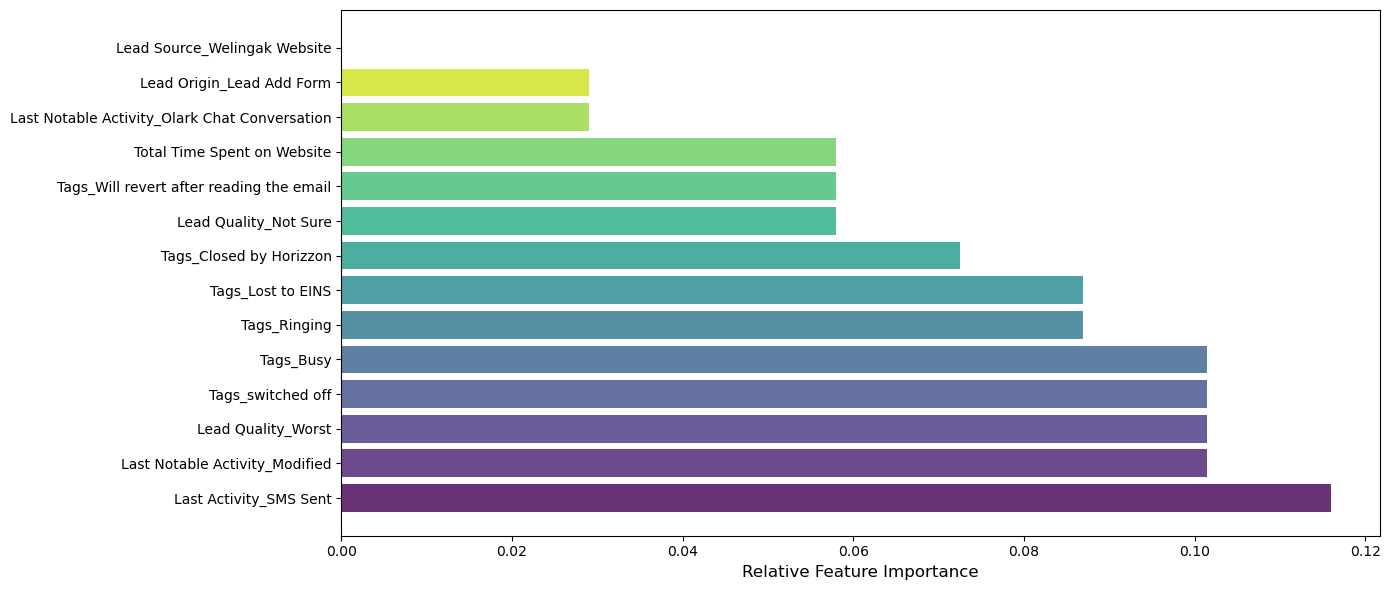

In [572]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# New sample data (replace this with your actual data)
X = pd.DataFrame({
    'Total Time Spent on Website': [10, 20, 15, 5, 30],
    'Lead Origin_Lead Add Form': [5, 3, 4, 2, 1],
    'Lead Source_Welingak Website': [3, 2, 4, 5, 1],
    'Last Activity_SMS Sent': [1, 0, 1, 0, 1],
    'Tags_Busy': [0, 1, 0, 1, 0],
    'Tags_Closed by Horizzon': [1, 0, 1, 0, 1],
    'Tags_Lost to EINS': [0, 1, 0, 1, 0],
    'Tags_Ringing': [1, 0, 1, 0, 1],
    'Tags_Will revert after reading the email': [0, 1, 0, 1, 0],
    'Tags_switched off': [1, 0, 1, 0, 1],
    'Lead Quality_Not Sure': [0, 1, 0, 1, 0],
    'Lead Quality_Worst': [1, 0, 1, 0, 1],
    'Last Notable Activity_Modified': [1, 0, 1, 0, 1],
    'Last Notable Activity_Olark Chat Conversation': [0, 1, 0, 1, 0]
})

y = pd.Series([1, 0, 1, 0, 1])  # Actual labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_

# Sort the feature importance
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order

# Prepare for plotting
fig, ax = plt.subplots(figsize=(14, 6))
pos = np.arange(len(sorted_idx))

# Check available columns
print("Available columns in X_train:", X_train.columns.tolist())

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_idx)))  # Use the viridis colormap

# Plot feature importance
try:
    ax.barh(pos, feature_importance[sorted_idx], align='center', color=colors, alpha=0.8)
    ax.set_yticks(pos)
    ax.set_yticklabels(X_train.columns[sorted_idx], fontsize=10)  # Use the correct column names
    ax.set_xlabel('Relative Feature Importance', fontsize=12)
    plt.tight_layout()
    plt.show()  # Ensure this line is properly indented and complete
except KeyError as e:
    print(f"KeyError: {e}")

<b> Final Observations and Recommendations </b> 

In [581]:

# The Final Evaluation Metrics for the test Dataset:

# The Confusion Matrix is 
#[[[1564  170]
 #[  88  901]]
#Accuracy : 0.9052515607785531
#Sensitivity : 0.9110212335692619
#Specificity : 0.9019607843137255
#Precision : 0.8412698412698413

Conclusion:
The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.

Here, the logistic regression model is used to predict the probabilty of conversion of a customer.

Optimum cut off is chosen to be 0.27 i.e. any lead with greater than 0.27 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.27 or less probability of converting is predicted as Cold Lead (customer will not convert)

Our final Logistic Regression Model is built with 14 features.

Features used in final model are ['Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation']

The top three categorical/dummy variables in the final model are ‘Lead Quality_Worst’, ‘Last Notable Activity_Modified’, ‘Last Activity_SMS Sent’ with respect to their Relative Feature Importance